In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('weatherAus.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(145460, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.isnull().sum()/len(data)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


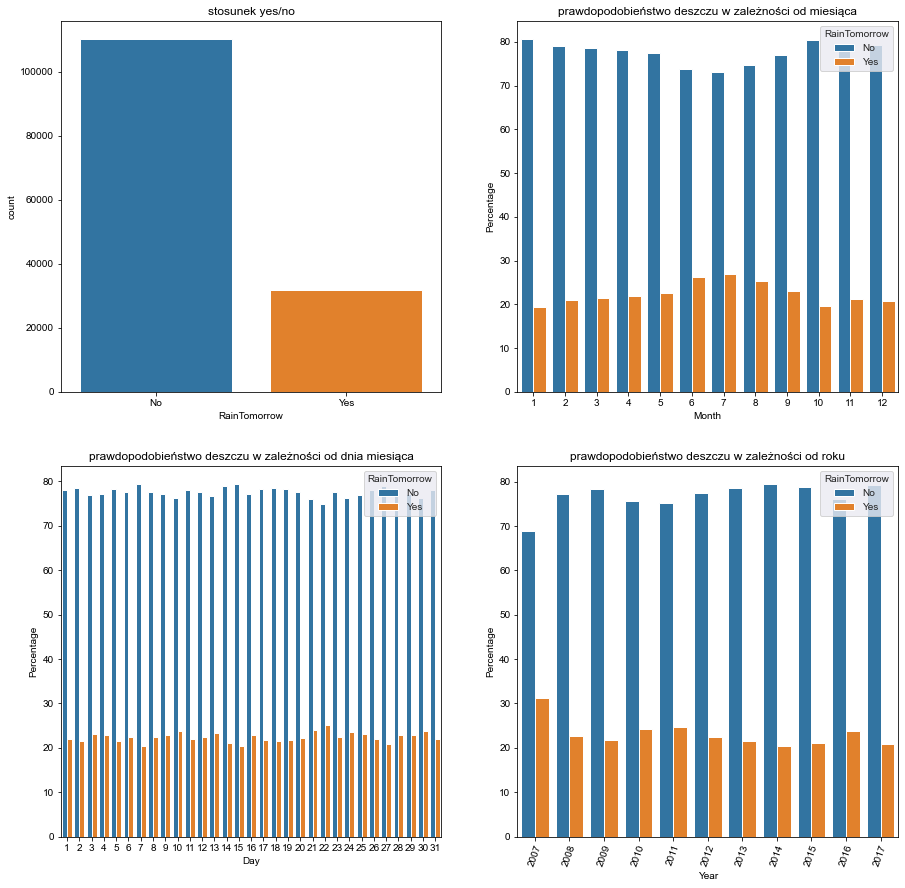

In [8]:
f , axes = plt.subplots(2,2, figsize = (15,15))
sns.set_style("darkgrid")

yes_no_dict = {'Yes':1, 'No':0}
data['RainToday_Num'] = data['RainToday'].map(yes_no_dict)
data['RainTomorrow_Num'] = data['RainTomorrow'].map(yes_no_dict)
fig1=sns.countplot(x=data['RainTomorrow'], ax = axes[0,0]).set(title='stosunek yes/no')


data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
month_counts = (data.groupby(['Month'])['RainTomorrow']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('Month'))
fig2 = sns.barplot(x='Month', y='Percentage', hue='RainTomorrow', data=month_counts,ax = axes[0,1]).set(title='prawdopodobieństwo deszczu w zależności od miesiąca')

data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
day_counts = (data.groupby(['Day'])['RainTomorrow']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('Day'))
fig3 = sns.barplot(x='Day', y='Percentage', hue='RainTomorrow', data=day_counts,ax = axes[1,0]).set(title='prawdopodobieństwo deszczu w zależności od dnia miesiąca')

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
year_counts = (data.groupby(['Year'])['RainTomorrow']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('Year'))
fig4 = sns.barplot(x='Year', y='Percentage', hue='RainTomorrow', data=year_counts,ax = axes[1,1]).set(title='prawdopodobieństwo deszczu w zależności od roku')

plt.xticks(rotation=70)

plt.show()

In [9]:
def encode_raintomorrow(data):
    data.RainToday.replace(['No', 'Yes'], [0, 1], inplace = True)
    return (data)

for i in [data]:
    encode_raintomorrow(i)

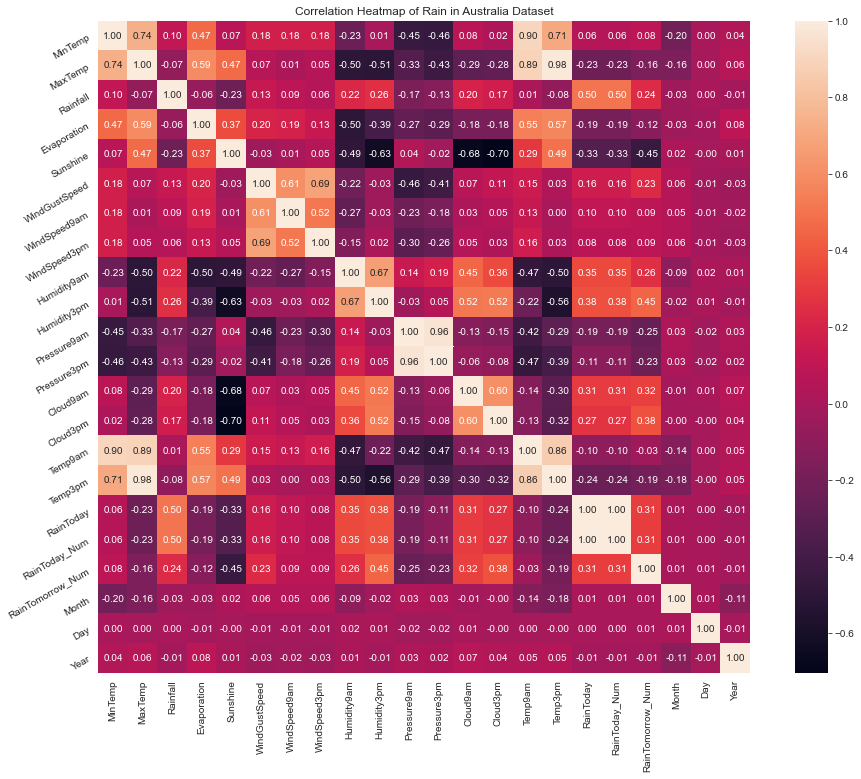

In [10]:
correlation = data.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [11]:
q1 = data.quantile(0.25) # wartości zmiennej na granicy pierwszego i drugiego kwartyla
q3 = data.quantile(0.75) # wartości zmiennej na granicy trzeciego i czwartego kwartyla
iqr = q3 - q1 # rozstęp międzykwartylowy
q1 = data.quantile(0.25) # wartości zmiennej na granicy pierwszego i drugiego kwartyla
q3 = data.quantile(0.75) # wartości zmiennej na granicy trzeciego i czwartego kwartyla
iqr = q3 - q1 # rozstęp międzykwartylowy
low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (data[iqr.index] < low_boundary).sum()
num_of_outliers_U = (data[iqr.index] > upp_boundary).sum()
outliers_15iqr = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})
outliers_15iqr

,lower_boundary,upper_boundary,num_of_outliers_L,num_of_outliers_U
MinTemp,-6.35,30.85,46,8
MaxTemp,2.45,43.65,320,169
Rainfall,-1.20,2.00,0,25578
Evaporation,-4.60,14.60,0,1995
Sunshine,-3.90,19.30,0,0
WindGustSpeed,5.50,73.50,0,3092
WindSpeed9am,-11.00,37.00,0,1817
WindSpeed3pm,-3.50,40.50,0,2523
Humidity9am,18.00,122.00,1425,0
Humidity3pm,-6.50,109.50,0,0


In [12]:
data.drop(['Temp9am','Pressure9am','RainToday','Location','MinTemp','Cloud3pm', 'Cloud9am','Sunshine','Evaporation','WindGustSpeed','RainToday_Num','RainTomorrow_Num','Month','Day','Year'],inplace= True,axis=1)

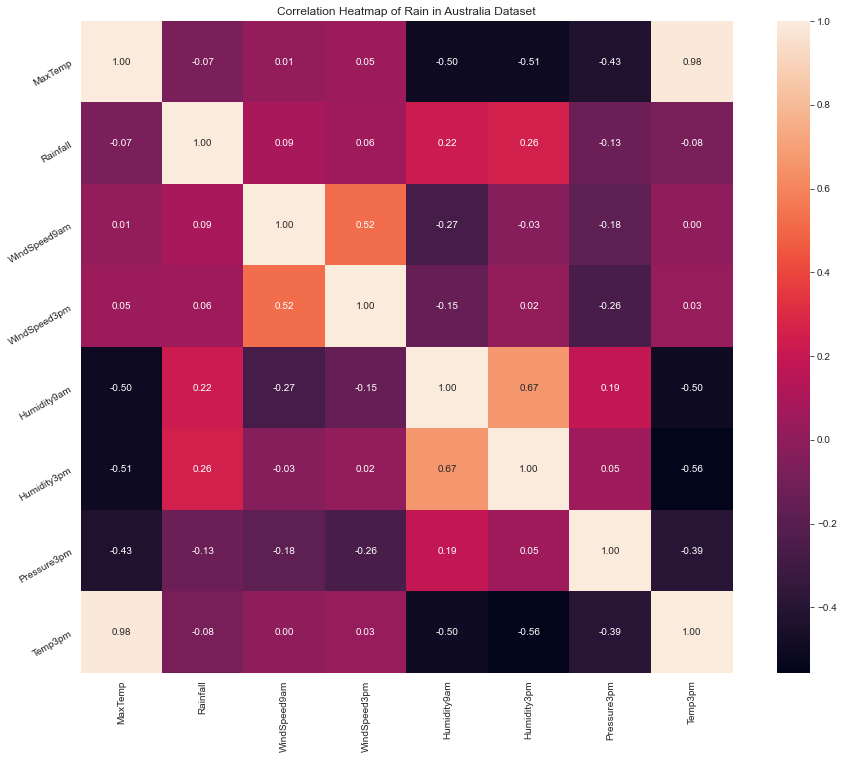

In [13]:
correlation = data.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.drop('Date',inplace= True,axis=1)

In [15]:
data = data[data['RainTomorrow'].notna()]

In [16]:
categorical = [col for col in data.columns if data[col].dtypes == 'O']
for col in categorical:
    col_mode=data[col].mode()[0]
    data[col].fillna(col_mode, inplace=True) 

C:\Users\Pawel\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
data['Rainfall'].fillna(0.0,inplace=True)

In [18]:
numerical = [col for col in data.columns if data[col].dtypes != 'O']
for col in numerical:
    col_median=data[col].mean()
    data[col].fillna(col_median, inplace=True) 

In [19]:
data.isnull().sum()/len(data)*100

MaxTemp         0.0
Rainfall        0.0
WindGustDir     0.0
WindDir9am      0.0
WindDir3pm      0.0
WindSpeed9am    0.0
WindSpeed3pm    0.0
Humidity9am     0.0
Humidity3pm     0.0
Pressure3pm     0.0
Temp3pm         0.0
RainTomorrow    0.0
Year            0.0
Month           0.0
Day             0.0
dtype: float64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   MaxTemp       142193 non-null  float64
 1   Rainfall      142193 non-null  float64
 2   WindGustDir   142193 non-null  object 
 3   WindDir9am    142193 non-null  object 
 4   WindDir3pm    142193 non-null  object 
 5   WindSpeed9am  142193 non-null  float64
 6   WindSpeed3pm  142193 non-null  float64
 7   Humidity9am   142193 non-null  float64
 8   Humidity3pm   142193 non-null  float64
 9   Pressure3pm   142193 non-null  float64
 10  Temp3pm       142193 non-null  float64
 11  RainTomorrow  142193 non-null  object 
 12  Year          142193 non-null  int64  
 13  Month         142193 non-null  int64  
 14  Day           142193 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 17.4+ MB


In [21]:
data['WindGustDir_encode'] = pd.factorize( data['WindGustDir'] )[0]
data['WindDir9am_encode'] = pd.factorize( data['WindDir9am'] )[0]
data['WindDir3pm _encode'] = pd.factorize( data['WindDir3pm'] )[0]
data.drop('WindGustDir',inplace= True,axis=1)
data.drop('WindDir9am',inplace= True,axis=1)
data.drop('WindDir3pm',inplace= True,axis=1)

<ipython-input-21-174bef04cb1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WindGustDir_encode'] = pd.factorize( data['WindGustDir'] )[0]
<ipython-input-21-174bef04cb1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WindDir9am_encode'] = pd.factorize( data['WindDir9am'] )[0]
<ipython-input-21-174bef04cb1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [22]:
def encode_raintomorrow(data):
    data.RainTomorrow.replace(['No', 'Yes'], [0, 1], inplace = True)
    return (data)

for i in [data]:
    encode_raintomorrow(i)

In [23]:
data.isnull().sum()/len(data)*100

MaxTemp               0.0
Rainfall              0.0
WindSpeed9am          0.0
WindSpeed3pm          0.0
Humidity9am           0.0
Humidity3pm           0.0
Pressure3pm           0.0
Temp3pm               0.0
RainTomorrow          0.0
Year                  0.0
Month                 0.0
Day                   0.0
WindGustDir_encode    0.0
WindDir9am_encode     0.0
WindDir3pm _encode    0.0
dtype: float64

In [24]:
data.shape

(142193, 15)

In [25]:
def get_scorePrecison(model,X_train,X_test,y_train,y_test):
    predictions = model.predict(X_test)
    return precision_score(predictions, y_test)
def get_scoreRecall(model,X_train,X_test,y_train,y_test):
    predictions = model.predict(X_test)
    return recall_score(predictions, y_test)
def get_scoreF(model,X_train,X_test,y_train,y_test):
    predictions = model.predict(X_test)
    return f1_score(predictions, y_test)
def get_scoreAccuracy(model,X_train,X_test,y_train,y_test):
    predictions = model.predict(X_test)
    return accuracy_score(predictions, y_test)

In [26]:
labels = np.array(data['RainTomorrow'])
data= data.drop('RainTomorrow', axis = 1)
data = np.array(data)
folds = StratifiedKFold(n_splits=10)

In [27]:
scoresP=[]
scoresR=[]
scoresF=[]
scoresA=[]
for train_index , test_index in folds.split(data,labels):
    X_train, X_test, y_train, y_test = data[train_index],data[test_index],labels[train_index],labels[test_index]
    tree = DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    scoresP.append(get_scorePrecison(tree,X_train, X_test, y_train, y_test))
    scoresR.append(get_scoreRecall(tree,X_train, X_test, y_train, y_test))  
    scoresF.append(get_scoreF(tree,X_train, X_test, y_train, y_test))
    scoresA.append(get_scoreAccuracy(tree,X_train, X_test, y_train, y_test)) 
    
print(np.mean(scoresP))
print(np.mean(scoresR))
print(np.mean(scoresF))
print(np.mean(scoresA))

0.5065137188838438
0.4609403139431326
0.48022676242393453
0.753961485439393


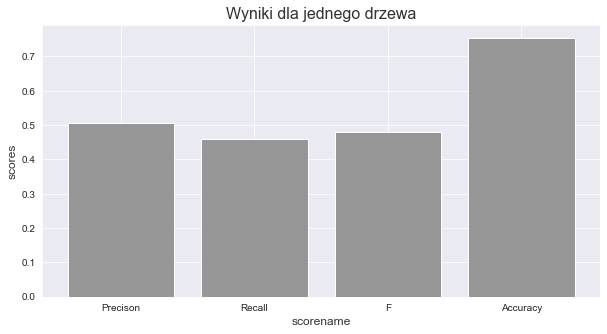

In [32]:
# Make a dataset:
scores = [np.mean(scoresP), np.mean(scoresR), np.mean(scoresF), np.mean(scoresA)]
scorename = ('Precison', 'Recall', 'F', 'Accuracy')
y_pos = np.arange(len(scores))
 
#Figsize
plt.figure(figsize=(10,5))
 
# Create bars
plt.bar(y_pos, scores, color = '#969696')
  
# Create names on the x-axis
plt.xticks(y_pos, scorename)
 
plt.xlabel('scorename', fontsize=12, color='#323232')
plt.ylabel('scores', fontsize=12, color='#323232')
plt.title('Wyniki dla jednego drzewa', fontsize=16, color='#323232')
 
 
# Show graphic
plt.show();

In [28]:
from sklearn.ensemble import RandomForestClassifier
scoresP2=[]
scoresR2=[]
scoresF2=[]
scoresA2=[]
for train_index , test_index in folds.split(data,labels):
    X_train, X_test, y_train, y_test = data[train_index],data[test_index],labels[train_index],labels[test_index]
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    scoresP2.append(get_scorePrecison(rf,X_train, X_test, y_train, y_test))
    scoresR2.append(get_scoreRecall(rf,X_train, X_test, y_train, y_test))  
    scoresF2.append(get_scoreF(rf,X_train, X_test, y_train, y_test))
    scoresA2.append(get_scoreAccuracy(rf,X_train, X_test, y_train, y_test)) 
    
print(np.mean(scoresP2))
print(np.mean(scoresR2))
print(np.mean(scoresF2))
print(np.mean(scoresA2))   

0.45597792986643115
0.7206521274811123
0.5516342002188391
0.8351537566511558


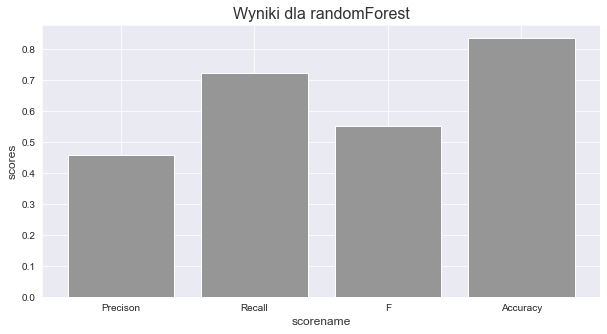

In [30]:
# Make a dataset:
scores = [np.mean(scoresP2), np.mean(scoresR2), np.mean(scoresF2), np.mean(scoresA2)]
scorename = ('Precison', 'Recall', 'F', 'Accuracy')
y_pos = np.arange(len(scores))
 
#Figsize
plt.figure(figsize=(10,5))
 
# Create bars
plt.bar(y_pos, scores, color = '#969696')
  
# Create names on the x-axis
plt.xticks(y_pos, scorename)
 
plt.xlabel('scorename', fontsize=12, color='#323232')
plt.ylabel('scores', fontsize=12, color='#323232')
plt.title('Wyniki dla randomForest', fontsize=16, color='#323232')
 
 
# Show graphic
plt.show();